# Supplementary Notebook 4: Select Major ABR genes
## Paper: Novel Approach for Microbiome Analysis Using Bacterial Replication Rates and Causal Inference to Determine Resistome Potential
### Vitalii Stebliankin, Musfiqur Sazal, Camilo Valdes, Kalai Mathee, and GiriNarasimhan

#### Dataset: Gibson et al. (BioProject ID: PRJNA301903)

In this notebook we will select ABR genes that present in at least 5% of the study samples

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

amr = "A-out/ptr_amr.csv"
major_file="analysis-out/1-FilteringPTR/PTR_species_filtered_metadata_major.csv"

out_dir="analysis-out/4-Select_major_ABR"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
    
out_file = out_dir+"/PTR_species_filtered_metadata_major_AMR.csv"


clinical_vars = ["Day_of_Life", "PostMenst_Age", "Gestational_Age",
                       "Birthweight", "Gentamicin", "Cefazolin","Ampicillin", "Trimethoprim.Sulfamathoxazole", "Meropenem",
                       "Vancomycin", "Ticarcillin.Clavulanate", "Clindamycin", "Cefotaxime", "Total_abx", "r_Gentamicin",
                       "r_Meropenem", "r_Ticarcillin.Clavulanate", "r_Vancomycin", "r_Ampicillin",
                       "r_Cefotaxime","r_TOTAL","Human_Milk","Maternal_Milk", "Donor_Milk", "Formula","Fortification","Vitamin_A",
                       "Caffeine","Iron","Furosemide_Lasix","m_ampicillin","m_ceftriaxone","m_azithromycin",
                       "m_amoxicillin", "m_cefazolin","m_erythromycin","m_gentamicin","m_penicillin","m_vancomycin",
                       "m_clindamycin","m_cefotaxime", "dur_membrane_rupture","Total.Antibiotic.Days", "Cohort", "CRIB.II.Score"]

threshold = 20
#method="top_largest"
method= "top_present"

df = pd.read_csv(amr)
amr_dict={"amr":[],"value":[], "nvalues":[]}

for col in df.columns:
    if "gb|" in col:
        amr_dict["value"].append(df[col].mean())
        amr_dict["amr"].append(col)
        amr_dict["nvalues"].append(len(df[df[col]>0]))


# Threshold. Top 200
amr_sorted = sorted(amr_dict["value"])
amr_df = pd.DataFrame(amr_dict)
print(len(amr_df))

if method=="top_largest":
    # Top Top 10 %:
    top_200 = amr_sorted[-threshold]
    #top_ten = amr_df["value"].quantile(.80)
    amr_df = amr_df[amr_df["value"]>top_200]
    amr_list = list(amr_df["amr"])

if method=="top_present":
    amr_df = amr_df[amr_df["nvalues"]>threshold]
    amr_list = list(amr_df["amr"])

print(len(amr_df))

new_amr_df = df[["sample"]+amr_list]
new_amr_df.index = new_amr_df["sample"]
new_amr_df = new_amr_df.drop("sample", axis=1)
new_amr_df.rename(columns=lambda x: x.replace("\n","").split("|")[-2] + x.replace("\n","").split("|")[-1], inplace=True)

#new_amr_df["sample"] = new_amr_df.index
# Merge with major df:
major_df = pd.read_csv(major_file)

major_df = major_df.merge(new_amr_df, on="sample", how="left")
major_df = major_df.fillna(1)

cols_to_drop = ["Clindamycin","Cefotaxime"]
for col in cols_to_drop:
    major_df = major_df.drop(col, axis=1)

major_df = major_df.drop("sample", axis=1)
major_df = major_df.drop("Individual", axis=1)
major_df = major_df.drop("AveragePTR", axis=1)
#major_df = major_df.drop("Cohort", axis=1)
major_df = major_df.drop("Antibiotic_Treatment", axis=1)
major_df = major_df.drop("Trimethoprim-Sulfamathoxazole", axis=1)
major_df = major_df.drop("Antibiotic_Treatment_unfiltered", axis=1)



#major_df.to_csv(out_file, index=False)
major_df.to_csv(out_file, index=False)

975
479


In [2]:
# Plot ABR profile

amr_df = pd.read_csv("A-out/ptr_amr.csv")
amr_cols = []
for col in amr_df.columns:
    if "ARO" in col:
        amr_cols.append(col)
        
amr_df.index = amr_df['Cohort']
amr_df = amr_df[amr_cols]
amr_df

,gb|AB008454|+|153-1290|ARO:3002493|SRT-1,gb|AB013298.1|+|2295-3195|ARO:3000319|mphC,gb|AB015853|+|1330-4471|ARO:3003033|mexY,gb|AB015853|+|145-1315|ARO:3003034|mexX,gb|AB023477|+|0-861|ARO:3001082|SHV-24,gb|AB049569|+|0-861|ARO:3000958|TEM-91,gb|AB089595|+|0-1206|ARO:3000166|tet(B),gb|AB091338|+|173-1355|ARO:3003551|emeA,gb|AB204810|+|186-1533|ARO:3000753|abeM,gb|AB205645|+|1012-1510|ARO:3002868|dfrG,...,gb|Y17581|+|78-936|ARO:3000891|TEM-20,gb|Y17582|+|0-858|ARO:3000892|TEM-21,gb|Y17583|+|213-1071|ARO:3000893|TEM-22,gb|Y17584|+|0-858|ARO:3000899|TEM-29,gb|Y17714|+|146-1016|ARO:3002399|OXY-2-4,gb|Y17715|+|146-1022|ARO:3002394|OXY-1-6,gb|Z11877.1|+|485-818|ARO:3004039|Escherichia,gb|Z21523|+|0-1974|ARO:3000191|tetQ,gb|Z30177|+|348-1224|ARO:3002389|OXY-1-1,gb|Z49084|+|311-1184|ARO:3002402|OXY-2-7
Cohort,,,,,,,,,,,,,,,,,,,,,
Control,0.0,8.341888,0.0,0.0,0.0,0.0,0.0,7.518527,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Antibiotic,0.0,6.372845,0.0,0.0,0.0,0.0,0.0,8.354969,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,1.958071,0.0
Antibiotic,0.0,4.597499,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.496179,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Antibiotic,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,9.223844,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Antibiotic,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,8.951526,0.0,0.000000,...,0.0,0.0,0.0,0.22806,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Antibiotic,0.0,4.052350,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Antibiotic,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Control,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4.228449,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [3]:
# check significance;
from scipy import stats
amr_df_tmp = amr_df.copy()
amr_df_tmp['cohort'] = amr_df_tmp.index

control_df = amr_df_tmp[amr_df_tmp['cohort']=='Control']
ab_df = amr_df_tmp[amr_df_tmp['cohort']=='Antibiotic']

cc_group = []
ac_group = []

for amr in amr_cols:
    U, p = stats.mannwhitneyu(control_df[amr], ab_df[amr])
    if p<0.05:
        if control_df[amr].mean()>ab_df[amr].mean():
            cc_group.append(amr)
        else:
            ac_group.append(amr)
print("{} genes are associated with CC".format(len(cc_group)))
print("{} genes are associated with AC".format(len(ac_group)))

108 genes are associated with CC
337 genes are associated with AC


In [4]:
amr_df

,gb|AB008454|+|153-1290|ARO:3002493|SRT-1,gb|AB013298.1|+|2295-3195|ARO:3000319|mphC,gb|AB015853|+|1330-4471|ARO:3003033|mexY,gb|AB015853|+|145-1315|ARO:3003034|mexX,gb|AB023477|+|0-861|ARO:3001082|SHV-24,gb|AB049569|+|0-861|ARO:3000958|TEM-91,gb|AB089595|+|0-1206|ARO:3000166|tet(B),gb|AB091338|+|173-1355|ARO:3003551|emeA,gb|AB204810|+|186-1533|ARO:3000753|abeM,gb|AB205645|+|1012-1510|ARO:3002868|dfrG,...,gb|Y17581|+|78-936|ARO:3000891|TEM-20,gb|Y17582|+|0-858|ARO:3000892|TEM-21,gb|Y17583|+|213-1071|ARO:3000893|TEM-22,gb|Y17584|+|0-858|ARO:3000899|TEM-29,gb|Y17714|+|146-1016|ARO:3002399|OXY-2-4,gb|Y17715|+|146-1022|ARO:3002394|OXY-1-6,gb|Z11877.1|+|485-818|ARO:3004039|Escherichia,gb|Z21523|+|0-1974|ARO:3000191|tetQ,gb|Z30177|+|348-1224|ARO:3002389|OXY-1-1,gb|Z49084|+|311-1184|ARO:3002402|OXY-2-7
Cohort,,,,,,,,,,,,,,,,,,,,,
Control,0.0,8.341888,0.0,0.0,0.0,0.0,0.0,7.518527,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Antibiotic,0.0,6.372845,0.0,0.0,0.0,0.0,0.0,8.354969,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,1.958071,0.0
Antibiotic,0.0,4.597499,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.496179,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Antibiotic,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,9.223844,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Antibiotic,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,8.951526,0.0,0.000000,...,0.0,0.0,0.0,0.22806,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Antibiotic,0.0,4.052350,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Antibiotic,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Control,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4.228449,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [5]:


amr_df = amr_df.T

amr_aro_df = amr_df
amr_aro_df['ARO Accession'] = amr_df.index
amr_aro_df['ARO Accession'] = amr_df['ARO Accession'].apply(lambda x: x.split('|')[-2])
amr_aro_df = amr_aro_df[['ARO Accession']]

amr_df
# Merge ARO accession with gene family

aro_index="analysis-out/4-Select_major_ABR/aro_index.tsv"
aro_df = pd.read_csv(aro_index, sep='\t')
aro_df

merged_df = amr_aro_df.merge(aro_df, how='left', on = "ARO Accession")
amr_df.index = merged_df['AMR Gene Family']
amr_df = amr_df.drop("ARO Accession", axis=1)
amr_df['AMR_gene_family'] = amr_df.index

amr_df = amr_df.groupby('AMR_gene_family').sum()
amr_df = amr_df.T
amr_df.to_csv("analysis-out/4-Select_major_ABR/gene_family.csv")
amr_df

AMR_gene_family,AAC(3),AAC(6'),AAC(6');APH(2''),ABC-F ATP-binding cassette ribosomal protection protein,ACC beta-lactamase,ACI beta-lactamase,ACT beta-lactamase,ADC beta-lactamase without carbapenemase activity,ANT(2''),ANT(3''),...,pmr phosphoethanolamine transferase,quinolone resistance protein (qnr),resistance-nodulation-cell division (RND) antibiotic efflux pump,rifamycin-resistant beta-subunit of RNA polymerase (rpoB),small multidrug resistance (SMR) antibiotic efflux pump,streptothricin acetyltransferase (SAT),sulfonamide resistant sul,tetracycline-resistant ribosomal protection protein,trimethoprim resistant dihydrofolate reductase dfr,undecaprenyl pyrophosphate related proteins
Cohort,,,,,,,,,,,,,,,,,,,,,
Control,0.0,6.684770,3.193791,43.516404,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.443338,0.000000
Antibiotic,0.0,0.000000,0.783545,31.924026,0.0,0.0,5.717853,0.0,0.0,0.0,...,1.567090,0.0,40.991846,4.326490,0.000000,0.000000,0.0,9.499444,10.517411,0.000000
Antibiotic,0.0,0.000000,0.348292,4.581135,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.348292,11.600552,0.000000,3.283578,0.0,1.211562,6.975028,0.000000
Antibiotic,0.0,0.000000,0.000000,9.622125,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,2.245900,0.000000,0.000000,0.000000,0.0,8.944177,10.458169,0.000000
Antibiotic,0.0,0.000000,0.424942,15.067023,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.752780,0.0,1.251156,0.000000,0.000000,0.000000,0.0,9.535018,9.141870,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Antibiotic,0.0,0.000000,0.000000,8.998861,0.0,0.0,0.000000,0.0,0.0,0.0,...,1.590613,0.0,78.613093,1.004240,0.000000,0.000000,0.0,3.815219,0.587791,3.592726
Antibiotic,0.0,0.000000,1.173357,2.252802,0.0,0.0,0.000000,0.0,0.0,0.0,...,1.173357,0.0,54.112305,0.000000,0.000000,0.000000,0.0,7.080267,3.948286,2.863303
Control,0.0,6.527649,0.000000,22.233330,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,2.601710,0.000000,0.000000,0.0,5.299413,7.124016,0.000000


In [6]:
# check significance;
from scipy import stats

major_gene_families=['resistance-nodulation-cell division (RND) antibiotic efflux pump',
'major facilitator superfamily (MFS) antibiotic efflux pump',
'TEM beta-lactamase',
'ATP-binding cassette (ABC) antibiotic efflux pump',
'pmr phosphoethanolamine transferase',
'ABC-F ATP-binding cassette ribosomal protection protein',
'ampC-type beta-lactamase',
'tetracycline-resistant ribosomal protection protein',
'OKP beta-lactamase',
'ACT beta-lactamase']

amr_df_tmp = amr_df[major_gene_families]
amr_df_tmp['cohort'] = amr_df_tmp.index

control_df = amr_df_tmp[amr_df_tmp['cohort']=='Control']
ab_df = amr_df_tmp[amr_df_tmp['cohort']=='Antibiotic']
for amr in amr_df_tmp.columns:
    U, p = stats.mannwhitneyu(control_df[amr], ab_df[amr])
    if p<0.05:
        print(amr, p)


resistance-nodulation-cell division (RND) antibiotic efflux pump 0.046165555630248205
major facilitator superfamily (MFS) antibiotic efflux pump 0.0008333285147150246
TEM beta-lactamase 0.0001404129446611249
ATP-binding cassette (ABC) antibiotic efflux pump 1.9187931280143002e-08
pmr phosphoethanolamine transferase 0.01608877571310205
ABC-F ATP-binding cassette ribosomal protection protein 0.006360317929445496
ampC-type beta-lactamase 0.013547847531417124
tetracycline-resistant ribosomal protection protein 3.2150133271392555e-06
OKP beta-lactamase 6.089044431519622e-09
ACT beta-lactamase 0.00021479230844706457
cohort 1.53430539427134e-87


<ipython-input-6-93a443081cab>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr_df_tmp['cohort'] = amr_df_tmp.index


In [7]:
merged_df.to_csv('analysis-out/4-Select_major_ABR/gene_family_out.csv')

In [8]:
major_gene_families=['resistance-nodulation-cell division (RND) antibiotic efflux pump',
'major facilitator superfamily (MFS) antibiotic efflux pump',
'ATP-binding cassette (ABC) antibiotic efflux pump',
'TEM beta-lactamase',
'ampC-type beta-lactamase',
'OKP beta-lactamase',
 'ACT beta-lactamase',                    
'pmr phosphoethanolamine transferase',
'ABC-F ATP-binding cassette ribosomal protection protein',
'tetracycline-resistant ribosomal protection protein']

In [9]:
amr_df.index

Index(['Control', 'Antibiotic', 'Antibiotic', 'Antibiotic', 'Antibiotic',
       'Antibiotic', 'Antibiotic', 'Control', 'Antibiotic', 'Antibiotic',
       ...
       'Control', 'Control', 'Control', 'Antibiotic', 'Control', 'Antibiotic',
       'Antibiotic', 'Control', 'Control', 'Antibiotic'],
      dtype='object', name='Cohort', length=393)

In [10]:
#print(amr_df_tmp.columns)
#amr_df_tmp = amr_df.drop(["cohort"], axis=1)
new_df={"CPM":[], "Gene Family":[], 'Cohort':[]}
for amr in amr_df_tmp.columns:
    if amr!='cohort':
        new_df["CPM"]+=list(amr_df_tmp[amr])
        new_df['Gene Family']+=[amr for x in range(len(amr_df_tmp))]
        new_df["Cohort"]+=list(amr_df_tmp.index)
    
new_df = pd.DataFrame(new_df)
new_df

,CPM,Gene Family,Cohort
0,0.000000,resistance-nodulation-cell division (RND) anti...,Control
1,40.991846,resistance-nodulation-cell division (RND) anti...,Antibiotic
2,0.348292,resistance-nodulation-cell division (RND) anti...,Antibiotic
3,2.245900,resistance-nodulation-cell division (RND) anti...,Antibiotic
4,1.251156,resistance-nodulation-cell division (RND) anti...,Antibiotic
...,...,...,...
3925,0.000000,ACT beta-lactamase,Antibiotic
3926,0.000000,ACT beta-lactamase,Antibiotic
3927,0.000000,ACT beta-lactamase,Control
3928,0.000000,ACT beta-lactamase,Control


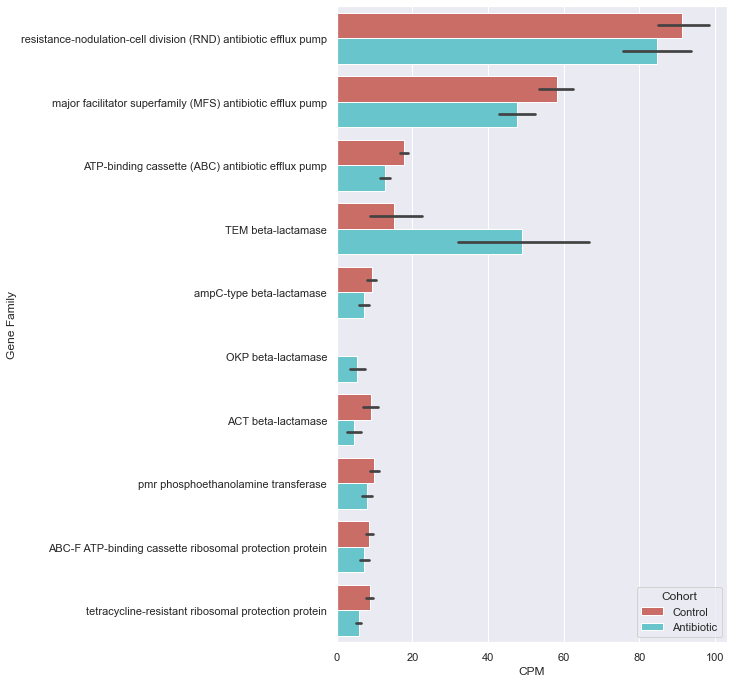

In [11]:
import seaborn as sns

sns.set_theme()
sns.set(rc={'figure.figsize':(7,11.7)})

g = sns.barplot(x = 'CPM', y = 'Gene Family', hue = 'Cohort', data = new_df,
            palette = 'hls', order=major_gene_families)
#g.set(xlim=(1, 3))
g